In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/experience-salary-dataset/Experience-Salary.csv
/kaggle/input/salaly-prediction-for-beginer/Salary Data.csv
/kaggle/input/salary-prediction-data/salary_prediction_data.csv


In [2]:
dataset3=pd.read_csv('/kaggle/input/experience-salary-dataset/Experience-Salary.csv')
dataset2=pd.read_csv('/kaggle/input/salary-prediction-data/salary_prediction_data.csv')
dataset1=pd.read_csv('/kaggle/input/salaly-prediction-for-beginer/Salary Data.csv')

In [3]:
dataset3

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236
...,...,...
995,22.161741,24.666502
996,32.266497,24.160270
997,17.039030,19.903797
998,25.222124,21.974413


In [4]:
dataset2

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,Female,64683.389864
996,High School,24,Urban,Engineer,30,Female,74468.205020
997,Master,18,Rural,Analyst,44,Male,98207.026024
998,Bachelor,27,Suburban,Director,31,Female,108544.922720


In [5]:
dataset1.iloc[373]

Age                                             34.0
Gender                                          Male
Education Level                           Bachelor's
Job Title              Senior Operations Coordinator
Years of Experience                              7.0
Salary                                       90000.0
Name: 373, dtype: object

In [6]:
dataset1.iloc[374]

Age                                       44.0
Gender                                  Female
Education Level                            PhD
Job Title              Senior Business Analyst
Years of Experience                       15.0
Salary                                150000.0
Name: 374, dtype: object

In [7]:
# # To find all duplicate rows in dataset1
# duplicates = dataset1[dataset1.duplicated()]
# duplicates

# If you want to include all duplicates (not just the later ones), use:
duplicates_all = dataset1[dataset1.duplicated(keep=False)]
duplicates_all

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
140,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
172,NaN,NaN,NaN,NaN,NaN,NaN
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
209,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
210,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
...,...,...,...,...,...,...
369,33.0,Male,Bachelor's,Junior Business Analyst,4.0,60000.0
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [8]:
print(dataset1.columns)
print(dataset2.columns)
print(dataset3.columns)

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')
Index(['Education', 'Experience', 'Location', 'Job_Title', 'Age', 'Gender',
       'Salary'],
      dtype='object')
Index(['exp(in months)', 'salary(in thousands)'], dtype='object')


In [9]:
dataset2.rename(columns={'Education':'Education Level','Experience':'Years of Experience','Job_Title':'Job Title'}, inplace=True)

In [10]:
dataset3.rename(columns={'exp(in months)':'Years of Experience','salary(in thousands)':'Salary'}, inplace=True)

In [11]:
dataset3

,Years of Experience,Salary
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236
...,...,...
995,22.161741,24.666502
996,32.266497,24.160270
997,17.039030,19.903797
998,25.222124,21.974413


In [12]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [13]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education Level      1000 non-null   object 
 1   Years of Experience  1000 non-null   int64  
 2   Location             1000 non-null   object 
 3   Job Title            1000 non-null   object 
 4   Age                  1000 non-null   int64  
 5   Gender               1000 non-null   object 
 6   Salary               1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [14]:
dataset2= dataset2.astype({'Years of Experience':'float64','Age':'float64'})

In [15]:
dataset1

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [16]:
dataset3

,Years of Experience,Salary
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236
...,...,...
995,22.161741,24.666502
996,32.266497,24.160270
997,17.039030,19.903797
998,25.222124,21.974413


In [17]:
dataset1.dropna(inplace=True)

In [18]:
dataset1.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


# We do exploratory data analysis

# From here i am moving forward with only one dataset i.e. dataset1

# Univariate Data Analysis 
## 1. Categorical plot

## a. Countplot
## Jab bhi koi categorical plot karna ho sabse pehle count plot karlo

# Categorical Data Columns
* Gender->Nominal Data->One hot Encoding
* Education Level->Ordinal Data->Ordinal Encoder
* Job Title->Ordinal Data->Ordinal Encoder

In [19]:
import seaborn as sns 
import matplotlib.pyplot as plt

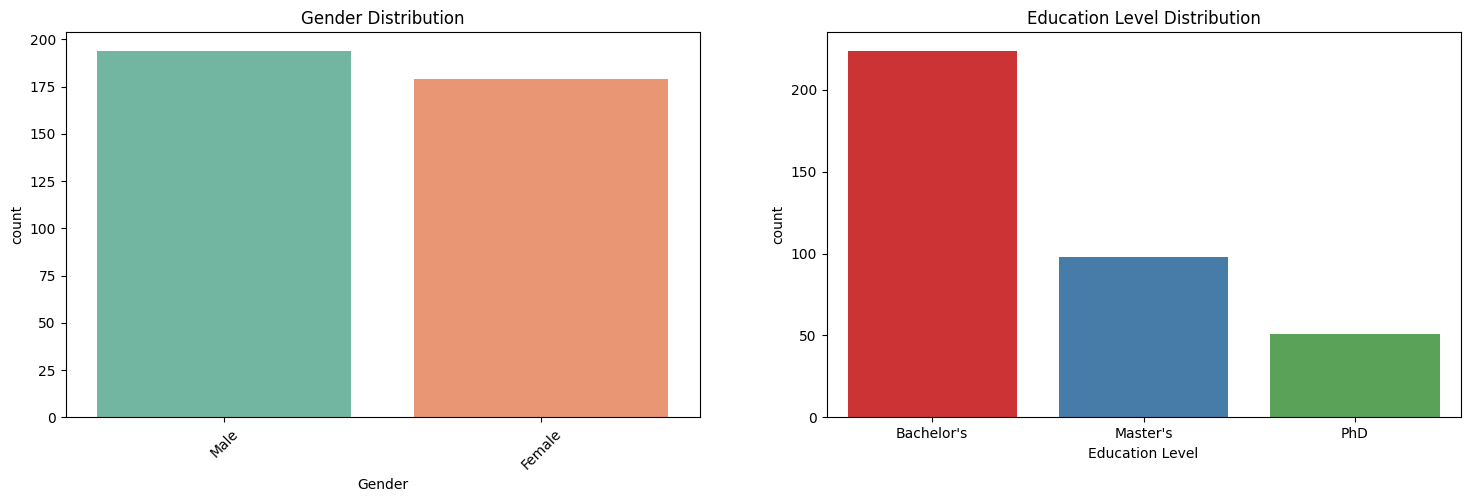

In [20]:
# plot the graph using the default estimator mean
# Set up the figure with one row and three columns
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Plot 1: Count plot for area_type
sns.countplot(x='Gender', data=dataset1, ax=axes[0], palette="Set2")
axes[0].set_title('Gender Distribution')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Count plot for bath
sns.countplot(x='Education Level', data=dataset1, ax=axes[1], palette="Set1")
axes[1].set_title('Education Level Distribution')

# # Plot 3: Count plot for balcony
# sns.countplot(x='Job Title', data=dataset1, ax=axes[2], palette="Set3")
# axes[2].set_title('Job Title Distribution')

# Improve layout and display
plt.show()

# b. PieChart

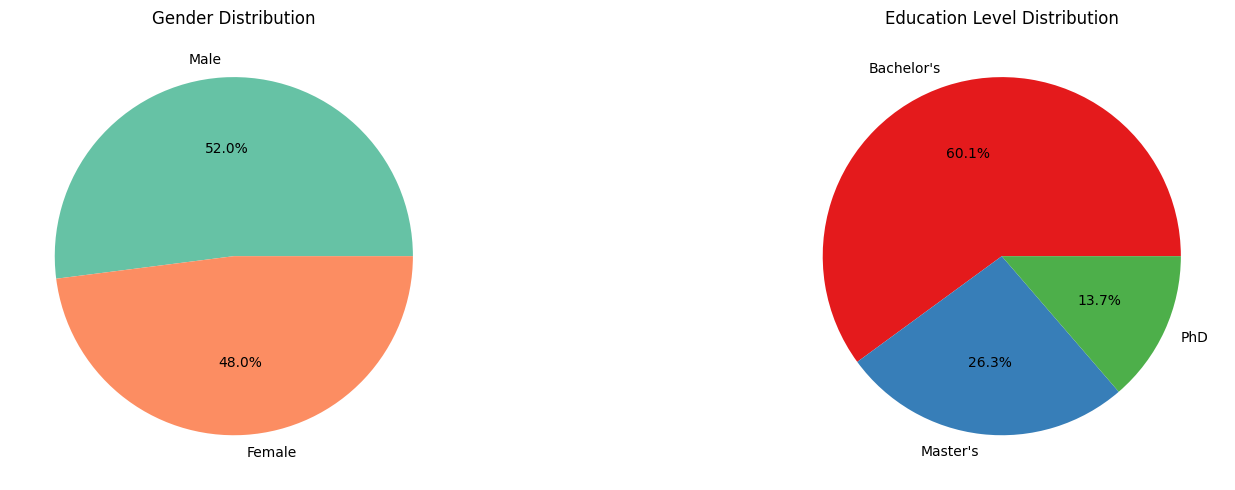

In [21]:
# Creating pie charts based on the count of unique values in the same columns.

# Set up the figure with one row and three columns
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Plot 1: Pie chart for area_type
area_type_counts = dataset1['Gender'].value_counts()
axes[0].pie(area_type_counts, labels=area_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
axes[0].set_title('Gender Distribution')

# Plot 2: Pie chart for bath
bath_counts = dataset1['Education Level'].value_counts()
axes[1].pie(bath_counts, labels=bath_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set1"))
axes[1].set_title('Education Level Distribution')

# # Plot 3: Pie chart for balcony
# balcony_counts = dataset1['Job Title'].value_counts()
# axes[2].pie(balcony_counts, labels=balcony_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set3"))
# axes[2].set_title('Job Title Distribution')

# Improve layout and display
plt.tight_layout()
plt.show()


# 2. Numerical Plot¶
## a. Histogram Plot

In [22]:
# # Set style for better aesthetics
# sns.set(style="whitegrid")

# # Create a figure and an array of subplots (3 rows, 1 column)
# fig, axes = plt.subplots(3, 1, figsize=(10, 18))  # 3 rows, 1 column

# # Adjust the layout for better spacing
# plt.subplots_adjust(hspace=0.4)

# # Plot Job Title distribution
# sns.histplot(dataset1['Job Title'], bins=20, color='skyblue', ax=axes[0], kde=True)
# axes[0].set_title('Distribution of Job Title', fontsize=16)
# axes[0].set_xlabel('Job Title', fontsize=12)
# axes[0].set_ylabel('Frequency', fontsize=12)

In [23]:
dataset1.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

# c. Box Plot

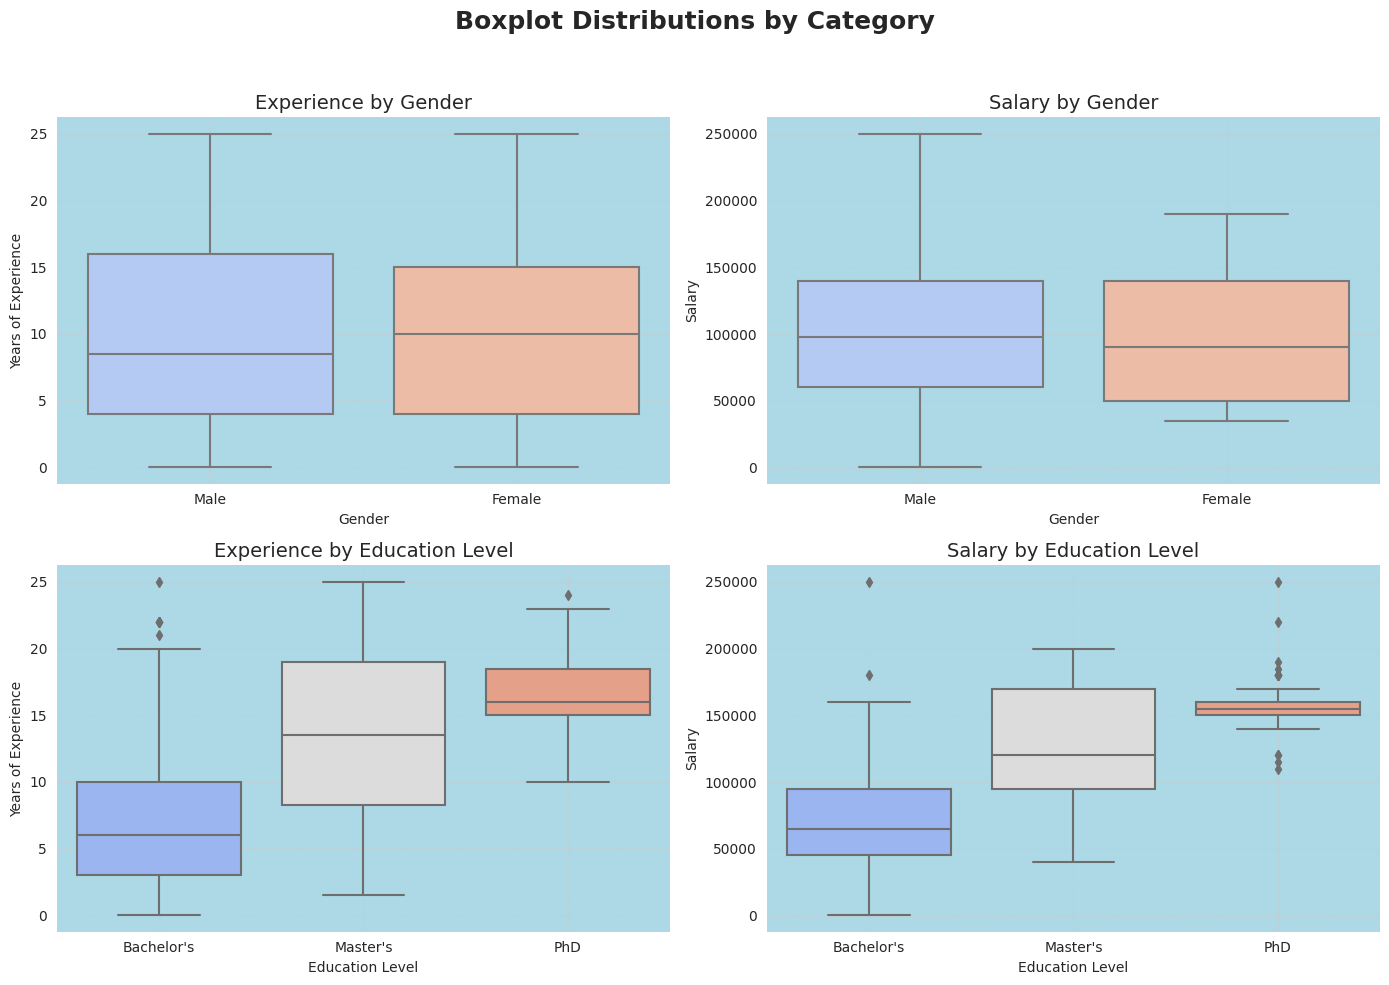

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply a clean aesthetic style
sns.set_style("whitegrid")

# Set up a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Boxplot Distributions by Category', fontsize=18, fontweight='bold')

# First subplot: Gender vs Years of Experience
sns.boxplot(ax=axes[0, 0], x='Gender', y='Years of Experience', data=dataset1, palette="coolwarm")
axes[0, 0].set_title('Experience by Gender', fontsize=14)
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Years of Experience')

# Second subplot: Gender vs Salary
sns.boxplot(ax=axes[0, 1], x='Gender', y='Salary', data=dataset1, palette="coolwarm")
axes[0, 1].set_title('Salary by Gender', fontsize=14)
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Salary')

# Third subplot: Education Level vs Years of Experience
sns.boxplot(ax=axes[1, 0], x='Education Level', y='Years of Experience', data=dataset1, palette="coolwarm")
axes[1, 0].set_title('Experience by Education Level', fontsize=14)
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Years of Experience')

# Fourth subplot: Education Level vs Salary
sns.boxplot(ax=axes[1, 1], x='Education Level', y='Salary', data=dataset1, palette="coolwarm")
axes[1, 1].set_title('Salary by Education Level', fontsize=14)
axes[1, 1].set_xlabel('Education Level')
axes[1, 1].set_ylabel('Salary')

# Improve layout and appearance
for ax in axes.flat:
    ax.grid(True, linestyle='--', alpha=0.6)
    sns.despine(ax=ax, left=True, bottom=True)
    ax.set_facecolor('lightblue')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Multivariate Analysis

# Multivariate Analysis 
## 1. ScatterPlot (Numerical-Numerical) 

In [25]:
dataset1.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

## For scatter plots, you should use two continuous (numeric) variables, as scatter plots show relationships between such variables.

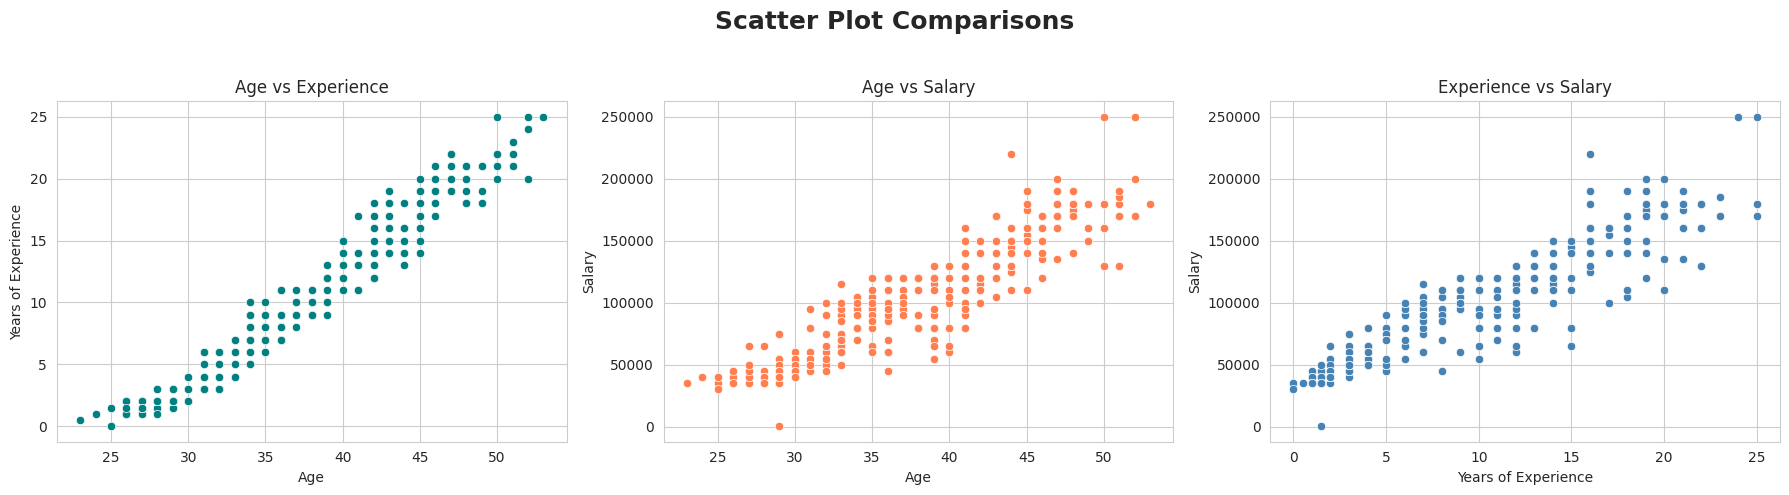

In [26]:
# Set aesthetic style
sns.set_style("whitegrid")

# Create a 1x3 subplot layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Scatter Plot Comparisons', fontsize=18, fontweight='bold')

# Age vs Years of Experience
sns.scatterplot(ax=axes[0], x='Age', y='Years of Experience', data=dataset1, color='teal')
axes[0].set_title('Age vs Experience')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Years of Experience')

# Age vs Salary
sns.scatterplot(ax=axes[1], x='Age', y='Salary', data=dataset1, color='coral')
axes[1].set_title('Age vs Salary')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Salary')

# Years of Experience vs Salary
sns.scatterplot(ax=axes[2], x='Years of Experience', y='Salary', data=dataset1, color='steelblue')
axes[2].set_title('Experience vs Salary')
axes[2].set_xlabel('Years of Experience')
axes[2].set_ylabel('Salary')

# Improve layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


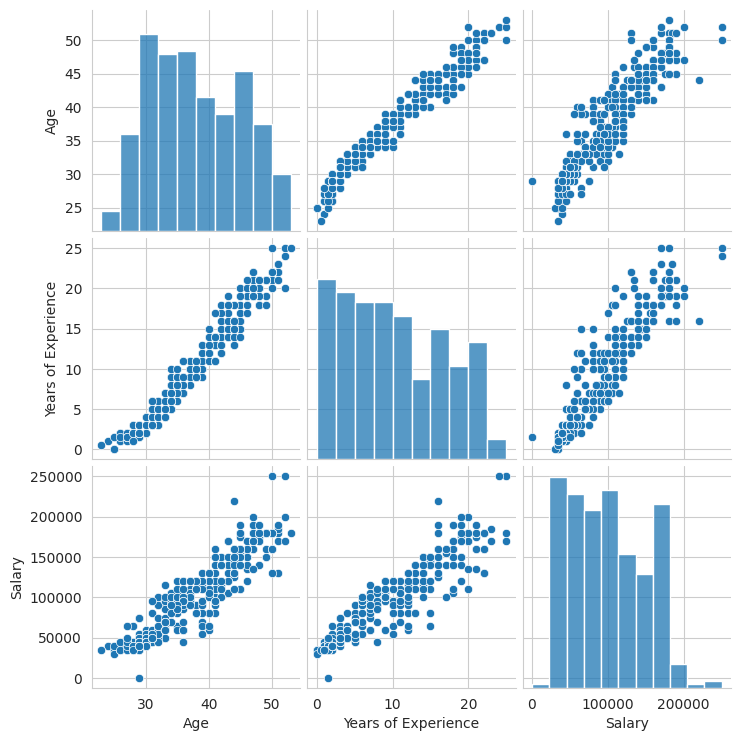

In [27]:
sns.pairplot(dataset1)

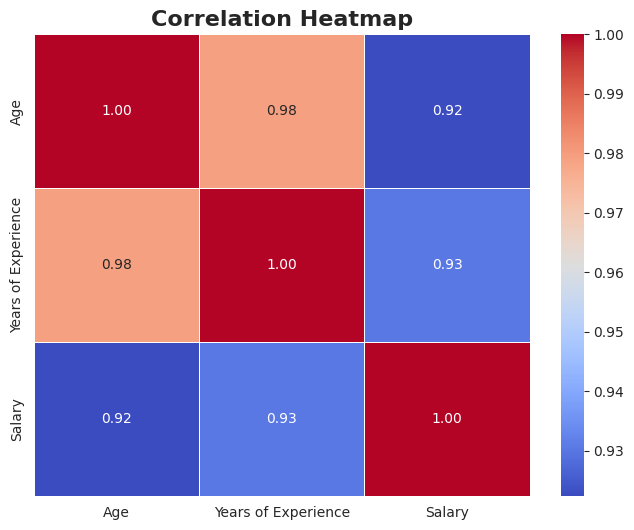

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_data = dataset1[['Age', 'Years of Experience', 'Salary']]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Set style
sns.set_style("whitegrid")

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Customize title
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()


# -->Applying column transformer to the required columns for simple imputer,Ordinal Encoder,One hot Encoding

In [29]:
# !pip install scikit-learn==1.7.0


In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline

In [31]:
import sklearn
print(sklearn.__version__)

1.2.2


In [32]:
dataset1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [33]:
dataset1['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [34]:
dataset1['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

In [35]:
job_title_order = [
    # Entry-level
    'Data Entry Clerk', 'Junior Developer', 'Junior Accountant', 'Junior Data Analyst',
    'Junior Software Developer', 'Junior HR Generalist', 'Junior Recruiter', 'Junior Designer',
    'Junior Web Developer', 'Junior Web Designer', 'Junior UX Designer', 'Junior Marketing Analyst',
    'Junior Marketing Specialist', 'Junior Project Manager', 'Junior Account Manager',
    'Junior Customer Support Specialist', 'Junior HR Coordinator', 'Junior Copywriter',
    'Junior Marketing Coordinator', 'Junior Social Media Manager', 'Junior Business Analyst',
    'Junior Operations Analyst', 'Junior Software Engineer', 'Junior Advertising Coordinator',
    'Junior Operations Manager', 'Junior Operations Coordinator', 'Junior Product Manager',
    'Junior Financial Analyst', 'Junior Business Development Associate',
    'Junior Financial Advisor', 'Junior Business Operations Analyst',
    'Junior Social Media Specialist', 'Junior Research Scientist',
    'Junior Sales Representative', 'Junior Marketing Manager',

    # Mid-level ICs
    'Administrative Assistant', 'Customer Service Rep', 'Customer Service Representative',
    'Help Desk Analyst', 'IT Support', 'IT Support Specialist', 'Technical Support Specialist',
    'Technical Writer', 'Graphic Designer', 'UX Designer', 'Copywriter', 'Accountant',
    'Recruiter', 'Sales Representative', 'Sales Associate', 'Marketing Analyst',
    'Social Media Specialist', 'Digital Content Producer', 'Content Marketing Manager',
    'Marketing Specialist', 'Data Analyst', 'Software Engineer', 'Software Developer',
    'Web Developer', 'Product Designer', 'Project Engineer', 'Business Analyst',
    'Operations Analyst', 'UX Researcher', 'Social Media Manager', 'Financial Analyst',
    'Customer Success Rep', 'Customer Success Manager', 'IT Manager',
    'Technical Recruiter', 'Network Engineer', 'Business Intelligence Analyst',
    'Office Manager', 'HR Generalist', 'Event Coordinator', 'Research Scientist',
    'Financial Advisor', 'Data Scientist', 'Product Marketing Manager', 'Product Manager',

    # Mid-Level Managers
    'Marketing Coordinator', 'Marketing Manager', 'HR Manager', 'Account Manager',
    'Customer Service Manager', 'Operations Manager', 'Financial Manager', 'Sales Manager',
    'Training Specialist', 'Project Manager', 'Sales Executive', 'Strategy Consultant',
    'Software Project Manager', 'Business Development Manager', 'Supply Chain Analyst',
    'Supply Chain Manager', 'Sales Director', 'Sales Operations Manager', 'Software Manager',

    # Senior ICs & Managers
    'Senior Engineer', 'Senior Software Developer', 'Senior Software Engineer',
    'Senior Financial Analyst', 'Senior Financial Advisor', 'Senior Analyst',
    'Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer',
    'Senior Scientist', 'Principal Scientist', 'Principal Engineer',
    'Senior Consultant', 'Senior Marketing Analyst', 'Senior Marketing Specialist',
    'Senior Marketing Manager', 'Senior Graphic Designer', 'Senior UX Designer',
    'Senior HR Manager', 'Senior HR Generalist', 'Senior Financial Manager',
    'Senior Business Analyst', 'Senior Account Manager', 'Senior Operations Analyst',
    'Senior Operations Manager', 'Senior Account Executive', 'Senior Researcher',
    'Senior Project Manager', 'Senior Marketing Coordinator', 'Senior Product Manager',
    'Senior Project Coordinator', 'Senior Product Designer', 'Senior Training Specialist',
    'Senior Research Scientist', 'Senior Human Resources Specialist', 'Senior HR Specialist',
    'Senior Operations Coordinator', 'Senior IT Project Manager', 'Senior IT Consultant',
    'Senior IT Support Specialist', 'Senior Business Development Manager',
    'Senior Product Development Manager', 'Senior Sales Manager',
    'Senior Sales Representative', 'Senior Quality Assurance Analyst',
    'Senior Human Resources Manager', 'Senior Marketing Director',
    'Senior Product Marketing Manager', 'Senior Software Architect',
    'Senior Manager', 'Senior Accountant', 'Senior Human Resources Coordinator',

    # Directors
    'Director', 'Creative Director', 'Research Director', 'Director of Finance',
    'Director of Operations', 'Director of Sales', 'Director of Marketing',
    'Director of Product Management', 'Director of Business Development',
    'Director of Sales and Marketing', 'Director of Human Capital',
    'Director of Engineering', 'Director of Human Resources', 'Director of HR',

    # VPs
    'VP of Operations', 'VP of Finance',

    # CXOs
    'Chief Technology Officer', 'Chief Data Officer', 'CEO'
]


In [36]:
#Encoding step=Categorical Data=>Ordinal Encoding for Ordinal data and One hot encoding for Nominal data




trf1 = ColumnTransformer(
    transformers=[
        ("ohe_Gender", OneHotEncoder(min_frequency=2, sparse_output=False, handle_unknown='ignore'), [1]),
        ("ordinal_Educational_Level", OrdinalEncoder(categories=[["Bachelor's", "Master's", "PhD"]]), [2]),
        ("ordinal_Job_Title", OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1,categories=[job_title_order]), [3]) 
    ],
    remainder='passthrough'
)



# trf2 = ColumnTransformer([
#     ("ohe_location", OneHotEncoder(min_frequency=180, sparse_output=False, handle_unknown='ignore'), [1]),
#     ("ordinal_area_type", OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1, categories=[['Super built-up  Area', 'Plot  Area', 'Built-up  Area','Carpet  Area']]), [0])
# ], remainder='drop')

In [37]:
from sklearn.linear_model import LinearRegression
trf2 = LinearRegression()

pipe=Pipeline([
     ('trf1',trf1),
     ('trf2',trf2)
]
)

In [38]:
dataset1[dataset1['Job Title']=='Technical Recruiter']

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
80,36.0,Male,Bachelor's,Technical Recruiter,8.0,70000.0


In [39]:
X=dataset1.drop(columns=['Salary'])
y=dataset1['Salary']

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=107)

In [73]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_Gender',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                min_frequency=2,
                                                                sparse_output=False),
                                                  [1]),
                                                 ('ordinal_Educational_Level',
                                                  OrdinalEncoder(categories=[["Bachelor's",
                                                                              "Master's",
                                                                              'PhD']]),
                                                  [2]),
                                                 ('ordinal_Job_Title',
                                                  OrdinalEncoder(categories=[['Data '
                                                                              'Entry '
                                                                              'Clerk',
                                                                              'Junior '
                                                                              'De...
                                                                              'Junior '
                                                                              'Software '
                                                                              'Engineer',
                                                                              'Junior '
                                                                              'Advertising '
                                                                              'Coordinator',
                                                                              'Junior '
                                                                              'Operations '
                                                                              'Manager',
                                                                              'Junior '
                                                                              'Operations '
                                                                              'Coordinator',
                                                                              'Junior '
                                                                              'Product '
                                                                              'Manager',
                                                                              'Junior '
                                                                              'Financial '
                                                                              'Analyst',
                                                                              'Junior '
                                                                              'Business '
                                                                              'Development '
                                                                              'Associate',
                                                                              'Junior '
                                                                              'Financial '
                                                                              'Advisor', ...]],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [3])])),
                ('trf2', LinearRegression())])

In [74]:
# Predict
y_pred = pipe.predict(X_test)
y_pred

array([ 95043.12276587,  62186.13796328,  40849.40919057, 155105.20111359,
       167240.54023655, 105307.44201971,  86555.07080414, 126922.87392111,
       149701.34580303, 119114.3950027 , 168103.58587513,  75497.98059904,
       106258.54088174, 135513.62304902,  98241.69773543, 152036.936405  ,
        36502.348358  , 120456.08900646, 159768.34079813,  67858.87103181,
        62487.43672887, 169542.3932768 ,  72806.13438668, 145564.05557767,
       109488.83440489,  91176.49267856, 206344.32584466,  25213.59436282,
        96517.45010933,  48994.00436233, 170230.64902256, 111236.38159318,
        50854.58623193, 132492.93690644,  52606.3735514 , 176851.48250336,
       190008.09616252, 186573.61580044, 101920.06226721, 105660.12073951,
       110958.28043411,  47470.24267137,  98060.70997428,  94297.4524242 ,
        99104.74337401, 104572.75037621,  84729.3064223 ,  85541.07406233,
        34375.28521056, 163937.51280371,  46923.18894185, 142697.35673027,
       174775.0968561 ,  

In [75]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.9330448368445652

In [78]:
# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# Create a formatted dataframe for display
results_df = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R² Score'],
    'Value': [f"{mae:.2f}", f"{mse:.2f}", f"{rmse:.2f}", f"{r2:.2f}"]
})

# Style the table (compatible with older pandas versions)
styled_df = results_df.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f0f0f0'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
]).hide(axis='index')

# Display the styled table
styled_df

Metric,Value
Mean Absolute Error (MAE),9011.97
Mean Squared Error (MSE),164123847.43
Root Mean Squared Error (RMSE),12811.08
R² Score,0.93


In [77]:
pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_Gender',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                min_frequency=2,
                                                                sparse_output=False),
                                                  [1]),
                                                 ('ordinal_Educational_Level',
                                                  OrdinalEncoder(categories=[["Bachelor's",
                                                                              "Master's",
                                                                              'PhD']]),
                                                  [2]),
                                                 ('ordinal_Job_Title',
                                                  OrdinalEncoder(categories=[['Data '
                                                                              'Entry '
                                                                              'Clerk',
                                                                              'Junior '
                                                                              'De...
                                                                              'Junior '
                                                                              'Software '
                                                                              'Engineer',
                                                                              'Junior '
                                                                              'Advertising '
                                                                              'Coordinator',
                                                                              'Junior '
                                                                              'Operations '
                                                                              'Manager',
                                                                              'Junior '
                                                                              'Operations '
                                                                              'Coordinator',
                                                                              'Junior '
                                                                              'Product '
                                                                              'Manager',
                                                                              'Junior '
                                                                              'Financial '
                                                                              'Analyst',
                                                                              'Junior '
                                                                              'Business '
                                                                              'Development '
                                                                              'Associate',
                                                                              'Junior '
                                                                              'Financial '
                                                                              'Advisor', ...]],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [3])])),
                ('trf2', LinearRegression())])

In [ ]:
import pickle

# Save the pipeline to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(pipe, file)

In [ ]:
with open('model.pkl','rb') as file:
    pre=pickle.load(file)